In [ ]:
#Share link: https://colab.research.google.com/drive/1VKIPustaQXKylYevdpnKgp22AtywCYPj?usp=sharing

In [ ]:
#some of the packages they reccomended for the midterm analysis; we're group 65 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import statsmodels
from scipy import stats
from scipy.stats import levene
import scipy.stats
import math
import random
import statistics
import scipy.stats as sp
from sklearn import linear_model
import seaborn as sns
from scipy.stats import ttest_ind
!pip install scikit_posthocs
!pip install researchpy
import researchpy as rp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from scipy.stats import f_oneway
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

from scipy.stats import chi2_contingency


In [ ]:
#loading the dataset
ASD=pd.read_csv("https://github.com/shionguha/inf2178-expdesignfordatascience-w23/blob/main/project%20dataset/Arrests_and_Strip_Searches_(RBDC-ARR-TBL-001).csv?raw=true")

In [ ]:
#Cleaning/pre-processing
pd.set_option('display.max_columns', None)
#we could compate Sex and Age Group,Search Reasons with each other, Arrest reasons with each other, Strip Search with Booked (whether they were searched or arrested), Arrest reasons with booked, search reasons with whether they were searched with ANOVAs
ASD.head()

,Arrest_Year,Arrest_Month,EventID,ArrestID,PersonID,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,ArrestLocDiv,StripSearch,Booked,Occurrence_Category,Actions_at_arrest___Concealed_i,Actions_at_arrest___Combative__,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,SearchReason_CauseInjury,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,ItemsFound,ObjectId
0,2020,July-Sept,1005907,6017884.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons,0,0,0,0,0,1,NaN,NaN,NaN,NaN,NaN,1
1,2020,July-Sept,1014562,6056669.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,2
2,2020,Oct-Dec,1029922,6057065.0,326622,Unknown or Legacy,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,3
3,2021,Jan-Mar,1052190,6029059.0,327535,Black,M,Aged 25 to 34 years,Not a youth,XX,0,0,Harassment/Threatening,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,4
4,2021,Jan-Mar,1015512,6040372.0,327535,South Asian,M,Aged 25 to 34 years,Not a youth,XX,0,1,FTA/FTC/Compliance Check/Parollee,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,5


In [ ]:
# Check the column names and data types
print(ASD.dtypes)

# Check for missing values
print(ASD.isnull().sum())


Arrest_Year                          int64
Arrest_Month                        object
EventID                              int64
ArrestID                           float64
PersonID                             int64
Perceived_Race                      object
Sex                                 object
Age_group__at_arrest_               object
Youth_at_arrest__under_18_years     object
ArrestLocDiv                        object
StripSearch                          int64
Booked                               int64
Occurrence_Category                 object
Actions_at_arrest___Concealed_i      int64
Actions_at_arrest___Combative__      int64
Actions_at_arrest___Resisted__d      int64
Actions_at_arrest___Mental_inst      int64
Actions_at_arrest___Assaulted_o      int64
Actions_at_arrest___Cooperative      int64
SearchReason_CauseInjury           float64
SearchReason_AssistEscape          float64
SearchReason_PossessWeapons        float64
SearchReason_PossessEvidence       float64
ItemsFound 

In [ ]:
# Summary statistics of numerical columns
print(ASD.describe())

        Arrest_Year       EventID      ArrestID       PersonID   StripSearch  \
count  65276.000000  6.527600e+04  6.480700e+04   65276.000000  65276.000000   
mean    2020.510096  1.029998e+06  6.032402e+06  318599.919695      0.119508   
std        0.499902  1.731809e+04  1.870751e+04   10815.387928      0.324388   
min     2020.000000  1.000000e+06  6.000000e+06  300000.000000      0.000000   
25%     2020.000000  1.015001e+06  6.016202e+06  309215.000000      0.000000   
50%     2021.000000  1.030006e+06  6.032402e+06  318595.500000      0.000000   
75%     2021.000000  1.044996e+06  6.048602e+06  327926.250000      0.000000   
max     2021.000000  1.060002e+06  6.064804e+06  337346.000000      1.000000   

             Booked  Actions_at_arrest___Concealed_i  \
count  65276.000000                     65276.000000   
mean       0.519502                         0.004075   
std        0.499623                         0.063706   
min        0.000000                         0.000000   

In [ ]:
sns.set(rc={'figure.figsize':(15,12)})
#this should change plot size

In [ ]:
#some functions from Tutorial:

def get_significance(p):
    """Returns the significance of a p-values as a string of stars."""
    if p <= 0.001:
        return '***'
    elif p <= 0.01:
        return '**'
    elif p <= 0.05:
        return '*'
    elif p <= 0.1:
        return '.'
    else:
        return ''
def round_p_value(p):
    """Round a small p-value so that it is human-readable."""
    if p < 0.001:
        return '<0.001'
    else:
        return f'{p:5.3}'


In [ ]:
def welch_dof(x, y): 
    '''
    Takes in final grades for binary features
    Returns degrees of freedom 
    '''
    dof = (x.var()/x.size + y.var()/y.size)**2 / ((x.var()/x.size)**2 / (x.size-1) + (y.var()/y.size)**2 / (y.size-1))
    return dof

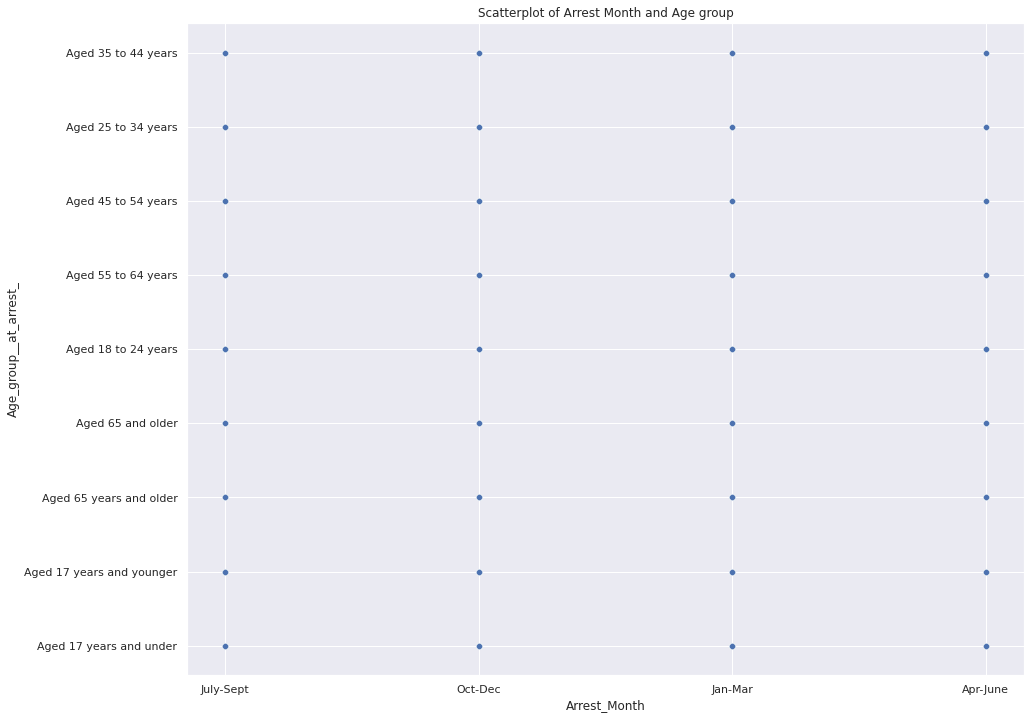

In [ ]:
# Check the relationship between age and arrest date
sns.scatterplot(x="Arrest_Month", y="Age_group__at_arrest_", data=ASD)
plt.title('Scatterplot of Arrest Month and Age group')
plt.show()

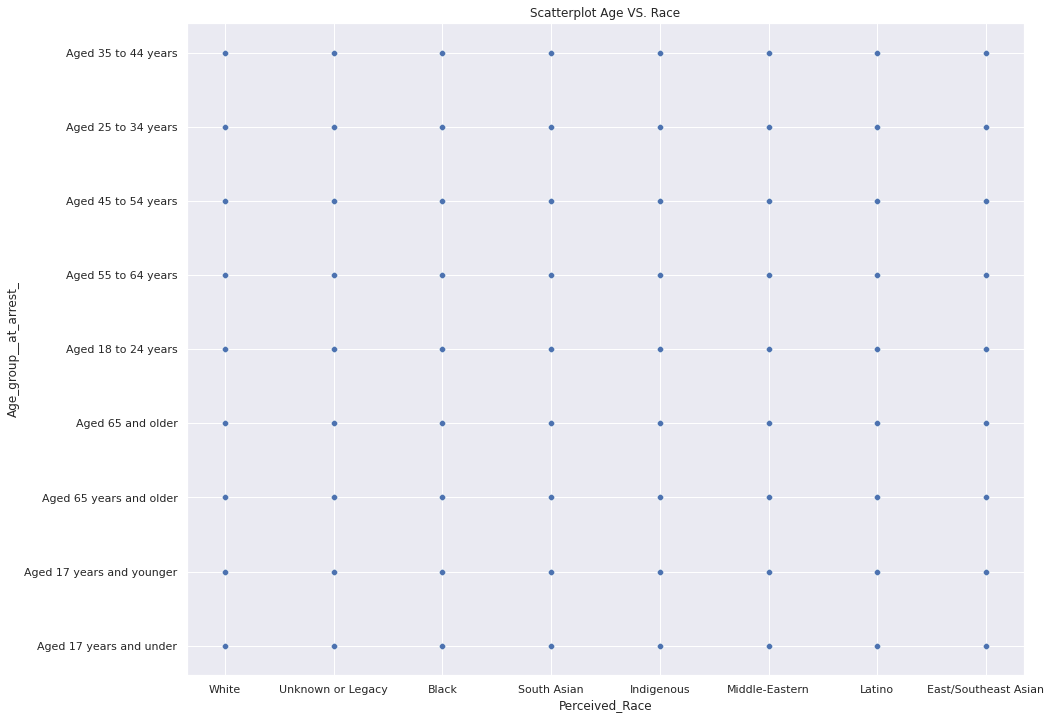

In [ ]:
# Check the relationship between age and race
sns.scatterplot(x="Perceived_Race", y="Age_group__at_arrest_", data=ASD)
plt.title("Scatterplot Age VS. Race")
plt.show()

Text(0.5, 1.0, 'Counted by age')

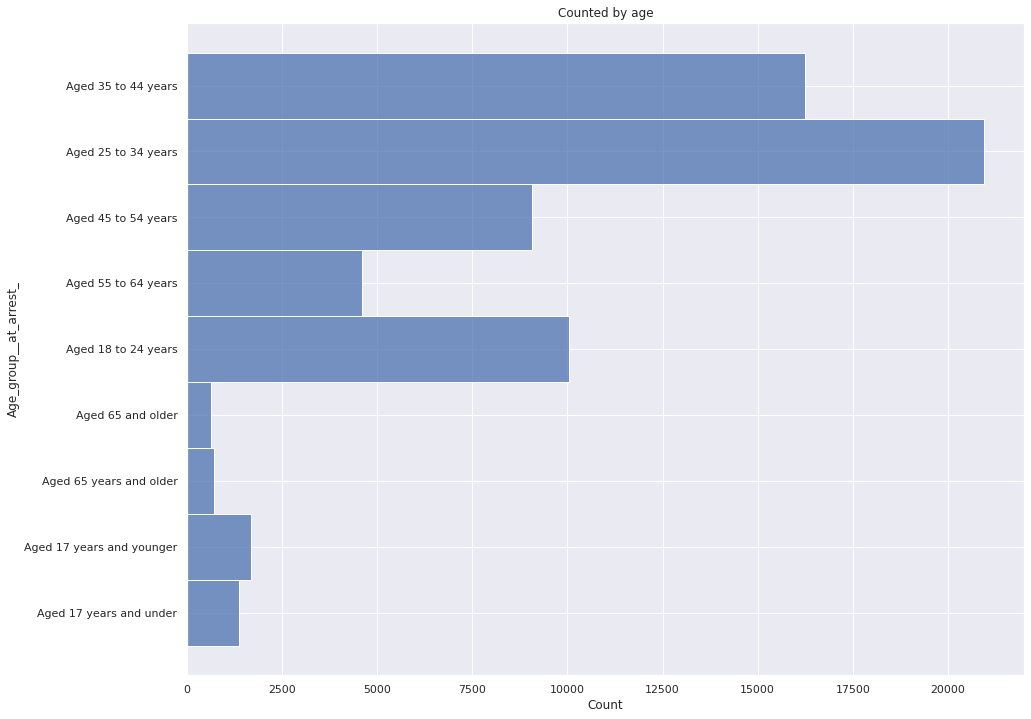

In [ ]:
# Plot a histogram of the "Age" column
sns.histplot(data=ASD,y="Age_group__at_arrest_")
plt.title("Counted by age")

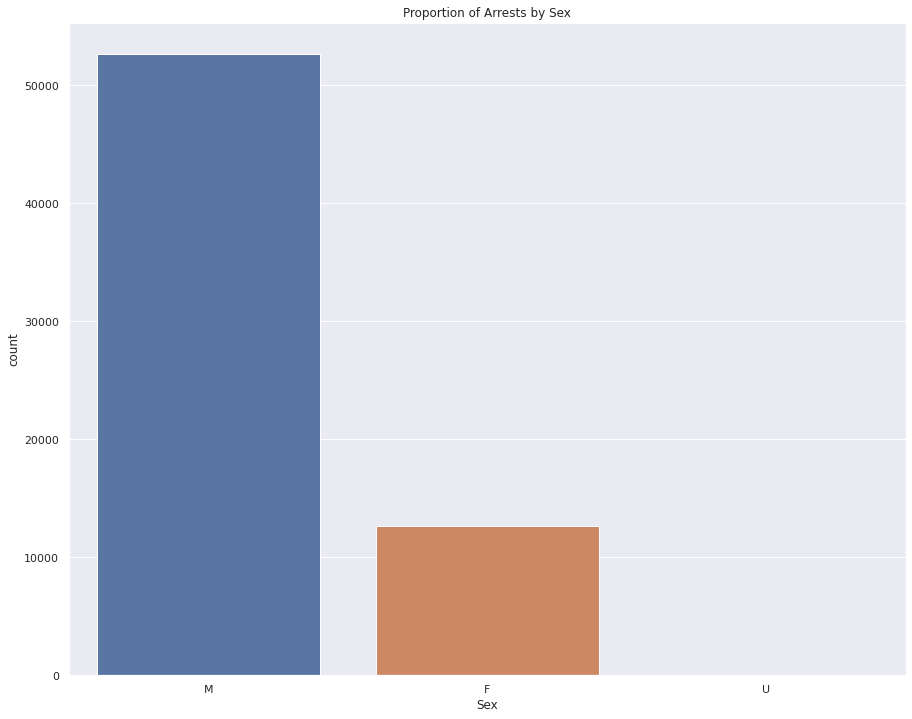

In [ ]:
# Check the distribution of gender
sns.countplot(x="Sex", data=ASD)
plt.title("Proportion of Arrests by Sex")
plt.show()

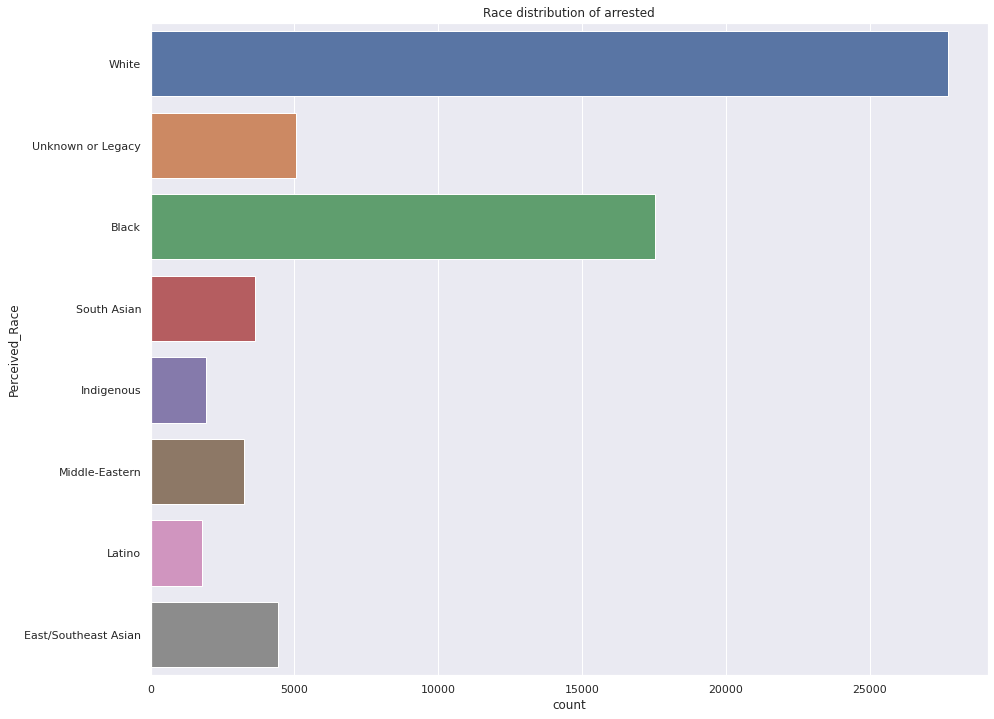

In [ ]:
# Check the distribution of race
sns.countplot(y="Perceived_Race", data=ASD, orient='h')
plt.title("Race distribution of arrested")
plt.show()

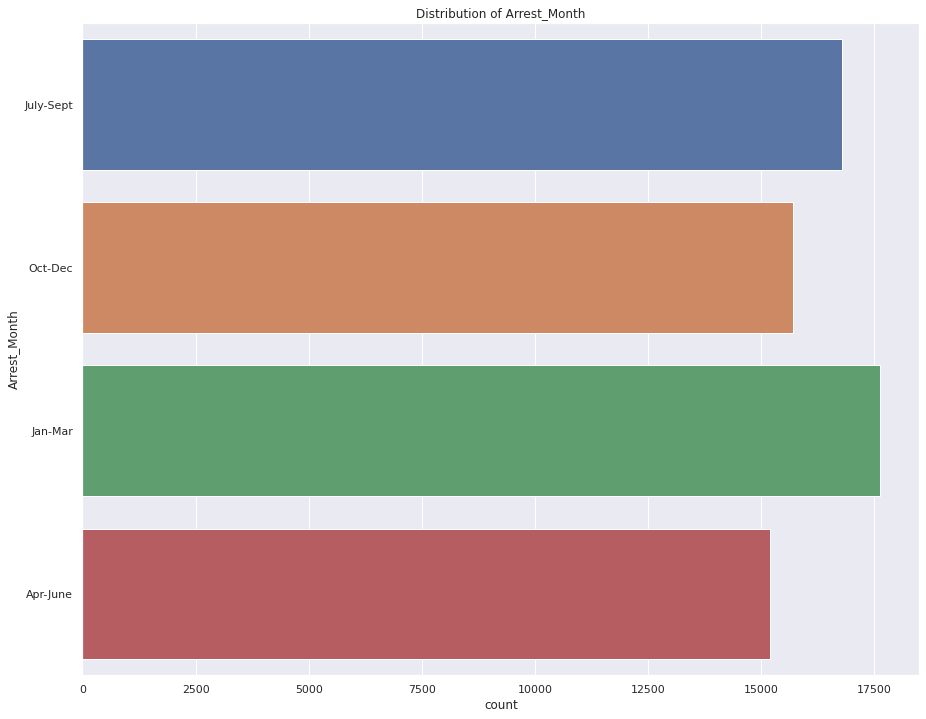

In [ ]:
sns.countplot(y="Arrest_Month", data=ASD, orient='h')
plt.title("Distribution of Arrest_Month")
plt.show()

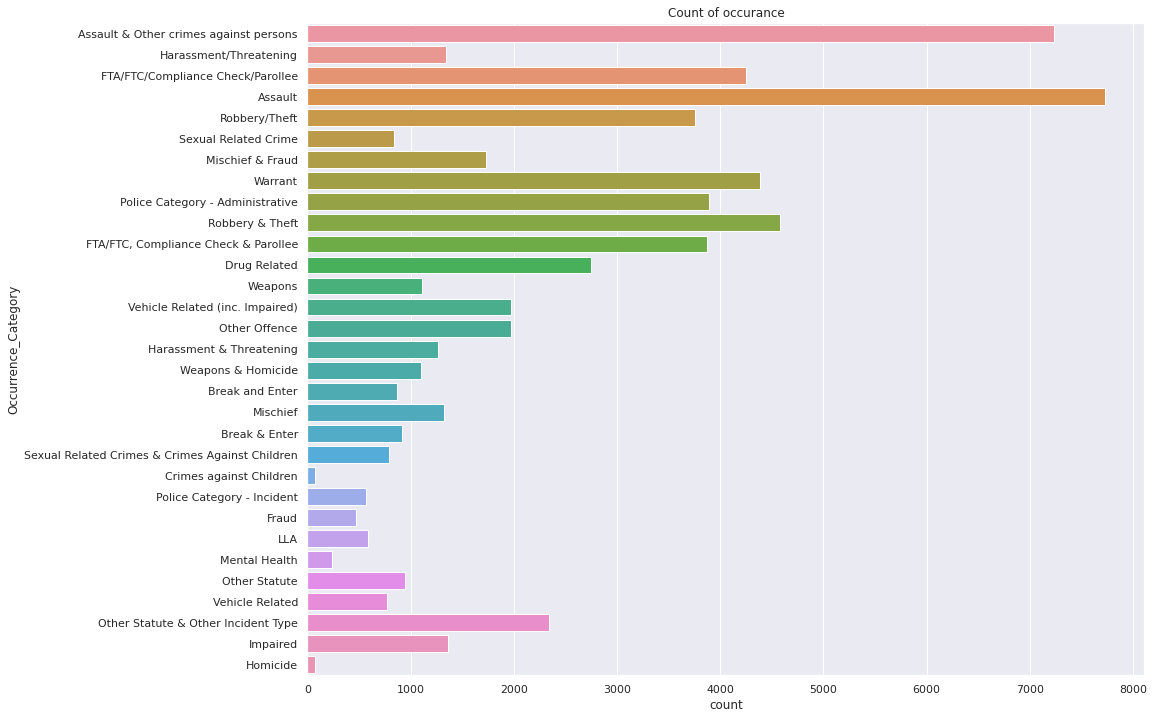

In [ ]:
# Check the distribution of Occurrence_Category 
sns.countplot(y="Occurrence_Category", data=ASD, orient='h')
plt.title("Count of occurance")
plt.show()

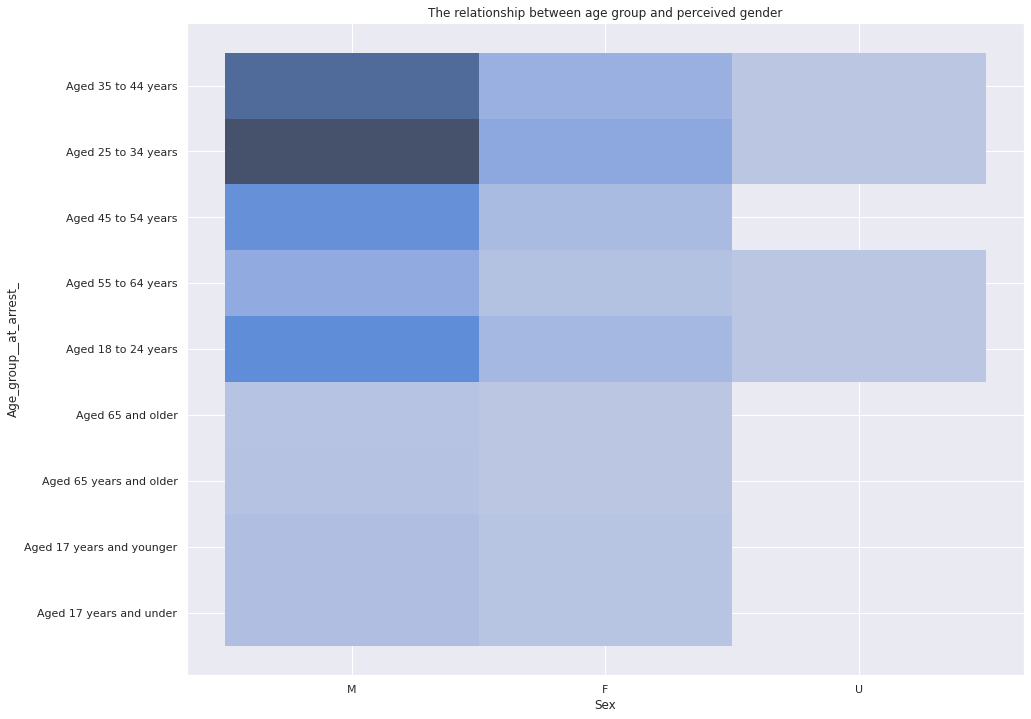

In [ ]:
# Create a plot showing the relationship between age group and perceived gender
sns.histplot(x="Sex", y="Age_group__at_arrest_", data=ASD)
plt.title("The relationship between age group and perceived gender")
plt.show()

In [ ]:
# Create a pivot table of the occurrence category and perceived race
pivot_table = pd.pivot_table(ASD, values='ObjectId', index='Occurrence_Category', columns='Perceived_Race', aggfunc='count')
# Print the pivot table
print(pivot_table)

Perceived_Race                                   Black  East/Southeast Asian  \
Occurrence_Category                                                            
Assault                                           2127                   648   
Assault & Other crimes against persons            1983                   597   
Break & Enter                                      143                    39   
Break and Enter                                    141                    45   
Crimes against Children                              9                     9   
Drug Related                                       948                   211   
FTA/FTC, Compliance Check & Parollee              1043                   201   
FTA/FTC/Compliance Check/Parollee                 1123                   225   
Fraud                                              118                    57   
Harassment & Threatening                           332                    63   
Harassment/Threatening                  

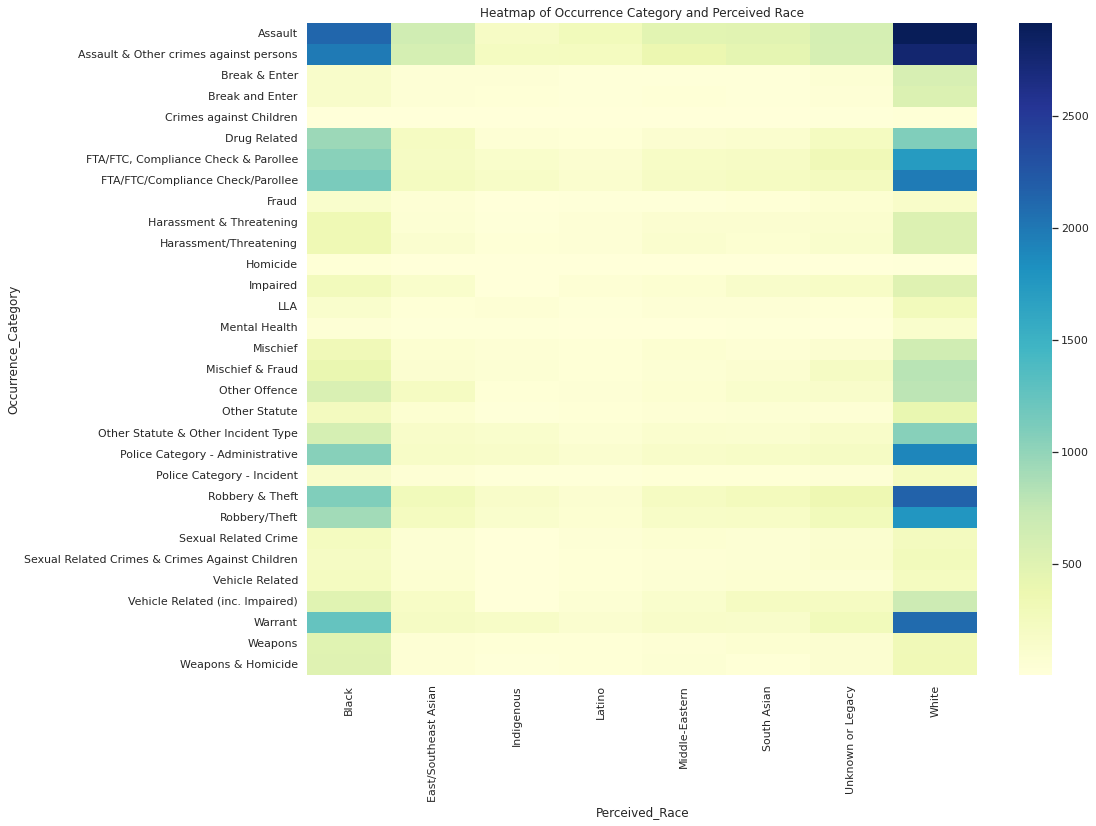

In [ ]:
# xCreate the heatmap
sns.heatmap(pivot_table, cmap='YlGnBu')
plt.title('Heatmap of Occurrence Category and Perceived Race')
plt.show()

In [ ]:
# Create separate DataFrames for each group
men = ASD[ASD['Sex'] == 'M']
women = ASD[ASD['Sex'] == 'F']
# Count the number of arrests for each group
num_arrests_men = men.shape[0]
num_arrests_women = women.shape[0]

print("Number of arrests for men:", num_arrests_men)
print("Number of arrests for women:", num_arrests_women)



Number of arrests for men: 52650
Number of arrests for women: 12617


In [ ]:
from scipy.stats.mstats_basic import ttest_1samp
# Extract the number of arrests for men and women
menenc = men['ObjectId']
womenenc = women['ObjectId']

# Perform t-test
print('Ttest for men and womens police encounters:',stats.ttest_ind(menenc,womenenc,equal_var=False))


Ttest for men and womens police encounters: Ttest_indResult(statistic=-16.55730686338168, pvalue=3.7159762383042504e-61)


In [ ]:
# Calculate the means and variances for each group
mean_men = men.mean()
mean_women = women.mean()
var_men = men.var()
var_women = women.var()

# Calculate the degrees of freedom
df_men = men.shape[0] - 1
df_women = women.shape[0] - 1

# Calculate the pooled variance
pooled_var = ((df_men * var_men) + (df_women * var_women)) / (df_men + df_women)

# Calculate the t-statistic and p-value
t_statistic = (mean_men - mean_women) / (pooled_var * ((1/df_men) + (1/df_women)))**0.5
p_value = stats.t.sf(abs(t_statistic), df_men + df_women) * 2

# Print the results
print("t-statistic:", t_statistic)
print("p-value:", p_value)

t-statistic: Arrest_Year                        -0.848945
EventID                             0.930916
ArrestID                           -0.277335
PersonID                           -0.723464
StripSearch                         6.878242
Booked                             21.162050
Actions_at_arrest___Concealed_i     4.733639
Actions_at_arrest___Combative__    -0.301960
Actions_at_arrest___Resisted__d     2.615887
Actions_at_arrest___Mental_inst    -4.646122
Actions_at_arrest___Assaulted_o    -3.089576
Actions_at_arrest___Cooperative     3.920438
SearchReason_CauseInjury           -0.587412
SearchReason_AssistEscape           3.623722
SearchReason_PossessWeapons        19.099863
SearchReason_PossessEvidence        6.770153
ItemsFound                         -8.411623
ObjectId                          -16.314813
dtype: float64
p-value: [3.95915284e-01 3.51900391e-01 7.81524144e-01 4.69397508e-01
 6.11389249e-12 4.60742132e-99 2.20991616e-06 7.62683465e-01
 8.90165405e-03 3.38892143e-06 

<ipython-input-22-e3e463fef244>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean_men = men.mean()
<ipython-input-22-e3e463fef244>:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean_women = women.mean()
<ipython-input-22-e3e463fef244>:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  var_men = men.var()
<ipython-input-22-e3e463fef244>:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will rais

In [ ]:
#Frequency and proportion of strip searches overall
total_strip_searches = ASD['StripSearch'].sum()
total_arrests = len(ASD)
proportion_strip_searches = total_strip_searches / total_arrests
print('Total strip searches: ', total_strip_searches)
print('Total arrests: ', total_arrests)
print('Proportion of arrests with strip searches: ', proportion_strip_searches)

Total strip searches:  7801
Total arrests:  65276
Proportion of arrests with strip searches:  0.11950793553526565


In [ ]:
# Frequency and proportion of strip searches by gender

strip_search_by_gender = ASD.groupby('Sex')['StripSearch'].sum()
total_by_gender = ASD.groupby('Sex')['StripSearch'].count()
proportion_by_gender = strip_search_by_gender / total_by_gender
print('Strip searches by gender:')
print(proportion_by_gender)

Strip searches by gender:
Sex
F    0.101688
M    0.123799
U    0.000000
Name: StripSearch, dtype: float64


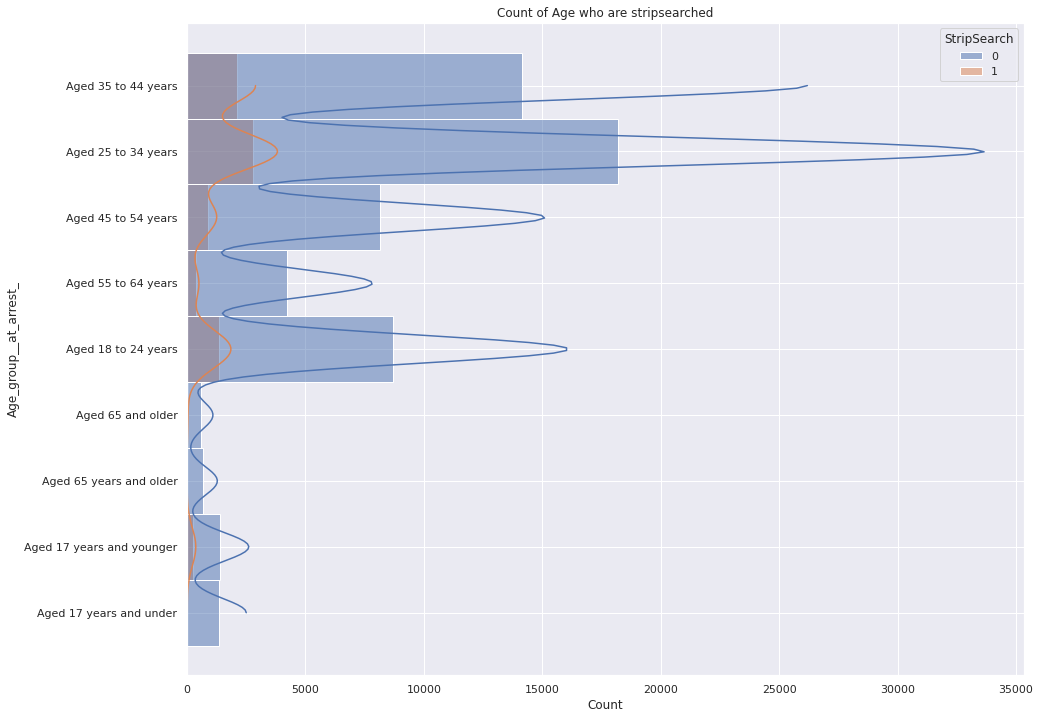

In [ ]:
sns.histplot(data=ASD, y='Age_group__at_arrest_', hue='StripSearch', kde=True, bins=30)
plt.title('Count of Age who are stripsearched')
plt.show()



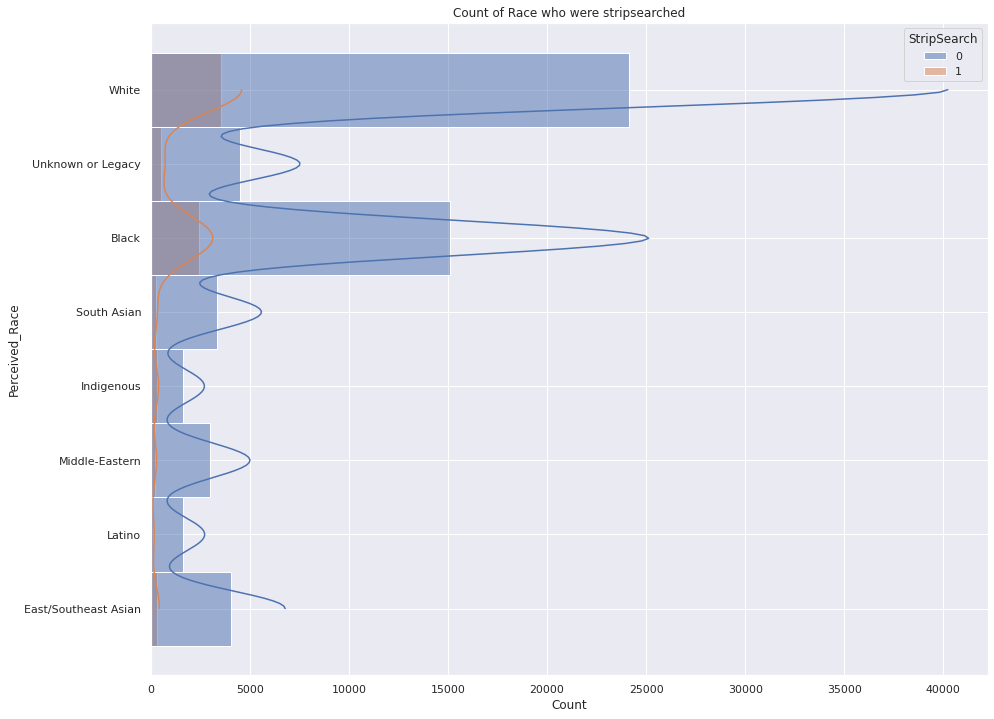

In [ ]:
sns.histplot(data=ASD, y='Perceived_Race', hue='StripSearch', kde=True, bins=30)
plt.title('Count of Race who were stripsearched')
plt.show()


In [ ]:
# Calculate total number of arrests for each race
arrests_by_race = ASD.groupby('Perceived_Race')['ArrestID'].count()

# Calculate total number of strip searches for each race
strip_searches_by_race = ASD.groupby('Perceived_Race')['StripSearch'].sum()

# Calculate the ratio of strip searches to arrests for each race
strip_search_ratio_by_race = strip_searches_by_race / arrests_by_race

In [ ]:
# Print out the results
print('Total arrests by race:')
print(arrests_by_race)
print()

print('Total strip searches by race:')
print(strip_searches_by_race)
print()

print('Strip search ratio by race:')
print(strip_search_ratio_by_race)

Total arrests by race:
Perceived_Race
Black                   17391
East/Southeast Asian     4401
Indigenous               1915
Latino                   1761
Middle-Eastern           3223
South Asian              3604
Unknown or Legacy        5014
White                   27495
Name: ArrestID, dtype: int64

Total strip searches by race:
Perceived_Race
Black                   2434
East/Southeast Asian     341
Indigenous               306
Latino                   132
Middle-Eastern           228
South Asian              257
Unknown or Legacy        536
White                   3566
Name: StripSearch, dtype: int64

Strip search ratio by race:
Perceived_Race
Black                   0.139957
East/Southeast Asian    0.077482
Indigenous              0.159791
Latino                  0.074957
Middle-Eastern          0.070742
South Asian             0.071310
Unknown or Legacy       0.106901
White                   0.129696
dtype: float64


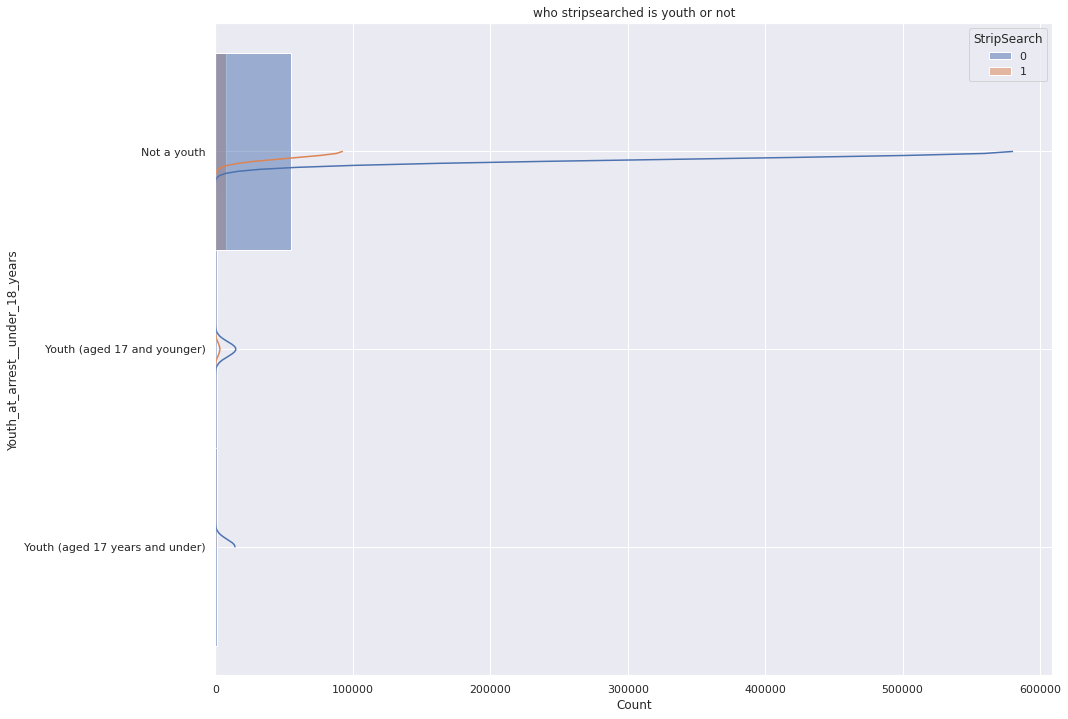

In [ ]:
sns.histplot(data=ASD, y='Youth_at_arrest__under_18_years', hue='StripSearch', kde=True, bins=30)
plt.title('who stripsearched is youth or not')
plt.show()

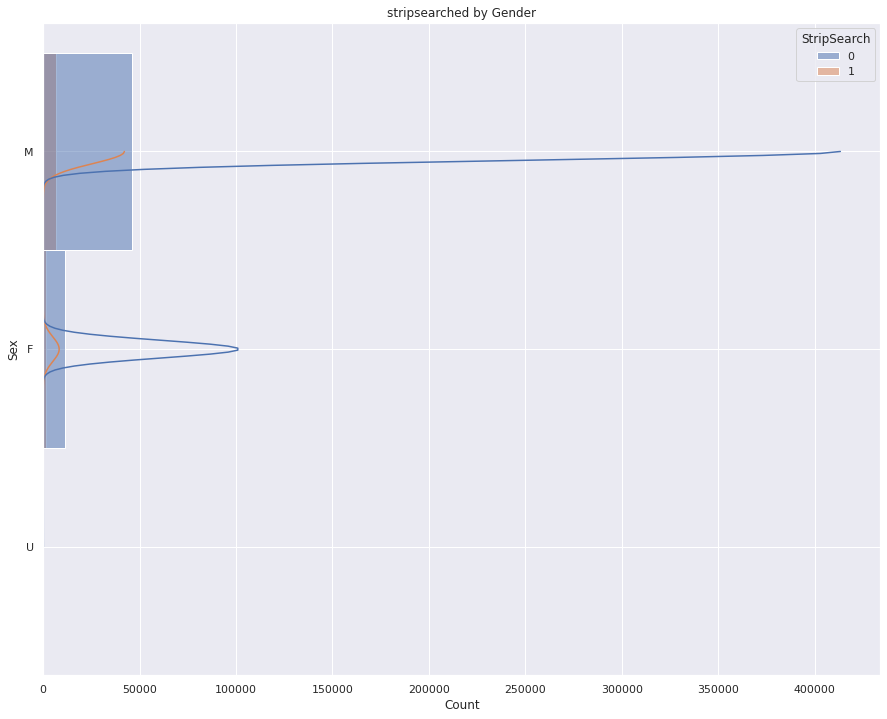

In [ ]:
sns.histplot(data=ASD, y='Sex', hue='StripSearch', kde=True, bins=30)
plt.title('stripsearched by Gender')
plt.show()

In [ ]:
# Chi-square test for independence between strip searches and gender
contingency_table = pd.crosstab(ASD['Sex'], ASD['StripSearch'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print('Chi-square statistic:', chi2)
print('P-value:', p_value)
if p_value < 0.05:
    print('There is a significant association between gender and strip searches.')
else:
    print('There is no significant association between gender and strip searches.')

Chi-square statistic: 48.50795288939
P-value: 2.9284098963956234e-11
There is a significant association between gender and strip searches.


In [ ]:
# Chi-square test for independence between strip searches and race
contingency_table = pd.crosstab(ASD['Perceived_Race'], ASD['StripSearch'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print('Chi-square statistic:', chi2)
print('P-value:', p_value)
if p_value < 0.05:
    print('There is a significant association between Perceived_Race and strip searches.')
else:
    print('There is no significant association between Perceived_Race and strip searches.')

Chi-square statistic: 383.9386412604204
P-value: 6.62139843678172e-79
There is a significant association between Perceived_Race and strip searches.


In [ ]:
contingency_table = pd.crosstab(ASD['Age_group__at_arrest_'], ASD['StripSearch'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print('Chi-square statistic:', chi2)
print('P-value:', p_value)
if p_value < 0.05:
    print('There is a significant association between Age_group__at_arrest_ and strip searches.')
else:
    print('There is no significant association between Age_group__at_arrest_ and strip searches.')

Chi-square statistic: 478.4256370791342
P-value: 2.9843711708976695e-98
There is a significant association between Age_group__at_arrest_ and strip searches.


In [ ]:
#1-way ANOVA
# Create a new variable that contain race and police encounters
whitep = ASD[ASD['Perceived_Race']=='White']['ObjectId']

blackp = ASD[ASD['Perceived_Race']=='Black']['ObjectId']

indigp = ASD[ASD['Perceived_Race']== 'Indigenous']['ObjectId']

SEAp = ASD[ASD['Perceived_Race']== 'East/Southeast Asian']['ObjectId']

Latinop = ASD[ASD['Perceived_Race']== 'Latino']['ObjectId']

MidEp = ASD[ASD['Perceived_Race']== 'Middle-Eastern']['ObjectId']

SAp = ASD[ASD['Perceived_Race']== 'South Asian']['ObjectId']

# Do Anova
statistic, pvalue = f_oneway(whitep, blackp, Latinop)

# Perform one-way ANOVA on the white black and lation data to prove this works
print(f'One-way ANOVA: s = {statistic}, p = {pvalue}')

One-way ANOVA: s = 151.25113025181153, p = 3.333445094545649e-66


In [ ]:
# 1 way ANOVAs indig SEA and MidEast
# Do Anova
statistic2, pvalue2 = f_oneway(indigp, SEAp, MidEp)

# Perform one-way ANOVA on the white black and lation data to prove this works
print(f'One-way ANOVA: s = {statistic2}, p = {pvalue2}')

One-way ANOVA: s = 4.270808166409572, p = 0.01428063661668165


In [ ]:
#Run Tukey test on this data
from statsmodels.stats.multicomp import pairwise_tukeyhsd
#
# perform Tukey's test
tukey = pairwise_tukeyhsd(endog=ASD['ObjectId'],
                          groups=ASD['Perceived_Race'],
                          alpha=0.05)

#display results
print(tukey)

                   Multiple Comparison of Means - Tukey HSD, FWER=0.05                   
       group1               group2         meandiff  p-adj     lower      upper    reject
-----------------------------------------------------------------------------------------
               Black East/Southeast Asian  4949.2681  0.001   1879.5604  8018.9759   True
               Black           Indigenous   937.8426    0.9  -2313.7554  4189.4407  False
               Black               Latino  6785.4174  0.001   2015.2365 11555.5982   True
               Black       Middle-Eastern  3004.4672 0.2158    -707.575  6716.5093  False
               Black          South Asian  3516.0165 0.0446     44.5564  6987.4766   True
               Black    Unknown or Legacy  3561.1153  0.001    983.2644  6138.9661   True
               Black                White   -92.6273    0.9  -1500.3088  1315.0542  False
East/Southeast Asian           Indigenous -4011.4255  0.074  -8212.5194   189.6684  False
East/South

In [ ]:
#Clean the data by removing any missing or invalid values, and convert the data types as needed
ASD = ASD.dropna()

ASD.reset_index(inplace=True)

ASD.head()

,index,Arrest_Year,Arrest_Month,EventID,ArrestID,PersonID,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,ArrestLocDiv,StripSearch,Booked,Occurrence_Category,Actions_at_arrest___Concealed_i,Actions_at_arrest___Combative__,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,SearchReason_CauseInjury,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,ItemsFound,ObjectId
0,12,2021,Apr-June,1039002,6030241.0,330778,Black,M,Aged 25 to 34 years,Not a youth,53,1,1,Sexual Related Crime,0,0,0,0,0,1,1.0,1.0,1.0,0.0,0.0,13
1,14,2020,Apr-June,1045382,6057058.0,312724,Black,M,Aged 25 to 34 years,Not a youth,53,1,1,Mischief & Fraud,0,0,0,0,0,0,1.0,1.0,1.0,0.0,0.0,15
2,33,2021,Jan-Mar,1026070,6064426.0,323427,White,M,Aged 35 to 44 years,Not a youth,53,1,1,Weapons,0,0,0,0,0,1,0.0,0.0,1.0,1.0,0.0,34
3,38,2020,Apr-June,1028958,6057012.0,319209,Latino,M,Aged 18 to 24 years,Not a youth,XX,1,1,"FTA/FTC, Compliance Check & Parollee",0,0,0,0,0,1,1.0,0.0,1.0,0.0,0.0,39
4,42,2020,July-Sept,1026364,6027584.0,316419,South Asian,F,Aged 25 to 34 years,Not a youth,52,1,1,Assault & Other crimes against persons,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,43


In [ ]:
ASD.tail()

,level_0,index,Arrest_Year,Arrest_Month,EventID,ArrestID,PersonID,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,ArrestLocDiv,StripSearch,Booked,Occurrence_Category,Actions_at_arrest___Concealed_i,Actions_at_arrest___Combative__,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,SearchReason_CauseInjury,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,ItemsFound,ObjectId
7326,7326,63915,2021,July-Sept,1055146,6021401.0,318526,Black,M,Aged 25 to 34 years,Not a youth,14,1,1,Drug Related,0,0,0,0,0,1,1.0,0.0,0.0,1.0,0.0,63916
7327,7327,64108,2021,Oct-Dec,1056864,6038551.0,333325,White,M,Aged 35 to 44 years,Not a youth,55,1,1,Break and Enter,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,64109
7328,7328,64235,2021,July-Sept,1059621,6007012.0,315379,South Asian,M,Aged 25 to 34 years,Not a youth,23,1,1,Vehicle Related,0,0,0,0,0,1,0.0,0.0,0.0,1.0,0.0,64236
7329,7329,64347,2021,Oct-Dec,1041289,6031529.0,301846,Black,M,Aged 17 years and under,Youth (aged 17 years and under),23,1,1,Weapons,0,0,0,0,0,0,0.0,0.0,1.0,1.0,1.0,64348
7330,7330,64428,2021,Oct-Dec,1048815,6018397.0,313844,Black,M,Aged 25 to 34 years,Not a youth,53,1,1,Assault,0,0,0,0,0,1,0.0,0.0,1.0,0.0,0.0,64429


In [ ]:
#Create a group for each race and calculate the total number of arrests for each group
groups_encounters = ASD.groupby('Perceived_Race')['ObjectId'].count()

In [ ]:
print(groups_encounters)

Perceived_Race
Black                   2299
East/Southeast Asian     327
Indigenous               287
Latino                   125
Middle-Eastern           214
South Asian              248
Unknown or Legacy        493
White                   3338
Name: ObjectId, dtype: int64


In [ ]:
#2-Way ANOVA
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Fit the two-way ANOVA model with 'Race', 'Age', and their interaction as the predictors

model = ols('ObjectId ~ C(Perceived_Race) + C(Age_group__at_arrest_) + C(Perceived_Race):C(Age_group__at_arrest_)', data=ASD).fit()

#not sure what should be wriiten at xxx

# Print the ANOVA table for the fitted model

anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

                                                  sum_sq      df          F  \
C(Perceived_Race)                           2.032664e+09     7.0   1.059784   
C(Age_group__at_arrest_)                    1.494645e+11     8.0  68.186430   
C(Perceived_Race):C(Age_group__at_arrest_)  4.719319e+10    56.0   3.075681   
Residual                                    1.992252e+12  7271.0        NaN   

                                                  PR(>F)  
C(Perceived_Race)                           3.465841e-01  
C(Age_group__at_arrest_)                    1.767476e-43  
C(Perceived_Race):C(Age_group__at_arrest_)  4.017217e-12  
Residual                                             NaN  


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 7, but rank is 2
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 8, but rank is 3
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 56, but rank is 49
  warnings.warn('covariance of constraints does not have full '


In [ ]:
#confidence interval
# compute confidence interval 
import statsmodels.stats.api as sms

cm = sms.CompareMeans(sms.DescrStatsW(mean_women), sms.DescrStatsW(mean_men))

print('Confidence interval for men and women:',cm.tconfint_diff(usevar='unequal'))

Confidence interval for men and women: (-964827.3670727303, 965161.8302737935)


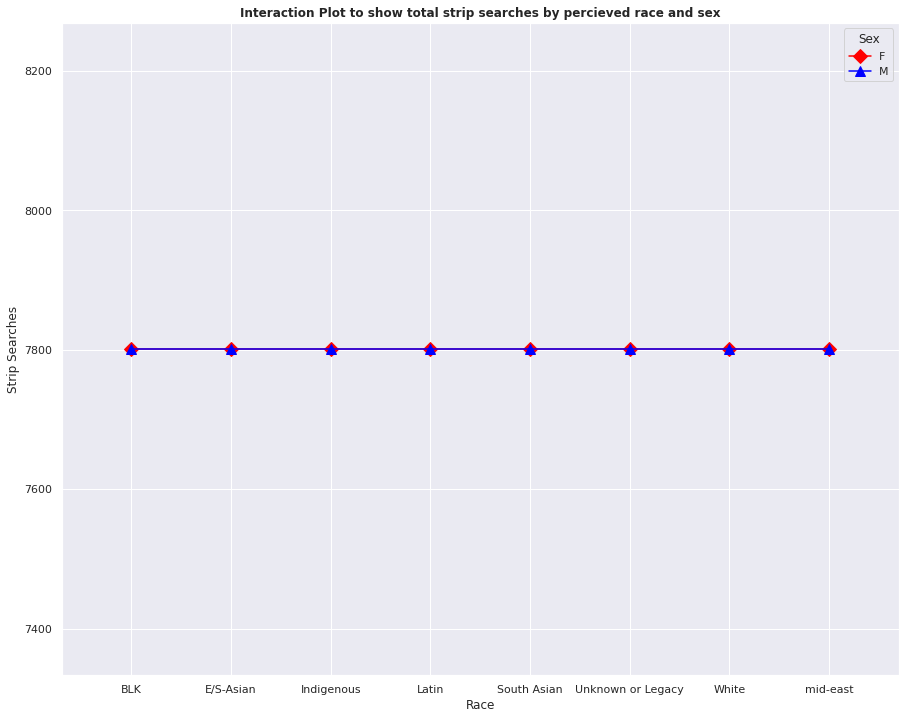

In [ ]:
#interaction plot for Race and sex with encounters with police
from statsmodels.graphics.factorplots import interaction_plot

#convert Race into continuous variables

ASDp = ASD.replace(['White','Black','Latino','Indigenous','East/Southeast Asian','Middle-Eastern','South-Asian'],['White','BLK','Latin','Indigenous','E/S-Asian','mid-east','S-Asian'])

racecnt = ASDp['Perceived_Race']
SEX = ASDp['Sex'].astype('category')

RSInteraction = interaction_plot(racecnt,SEX, total_strip_searches, colors=['red','blue'], markers=['D','^'], ms=10)

plt.ylabel('Strip Searches')
plt.xlabel('Race')
plt.title('Interaction Plot to show total strip searches by percieved race and sex', fontweight='bold')
plt.show()